<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/Ad_Click_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('advertising.csv')

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

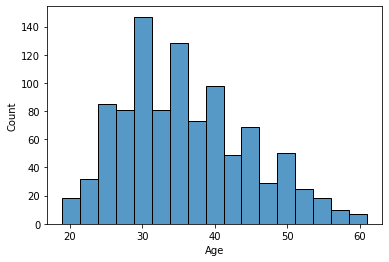

In [ ]:
sns.histplot(data=df["Age"])

**Create a jointplot showing Area Income versus Age.**

In [ ]:
import scipy.stats as stats

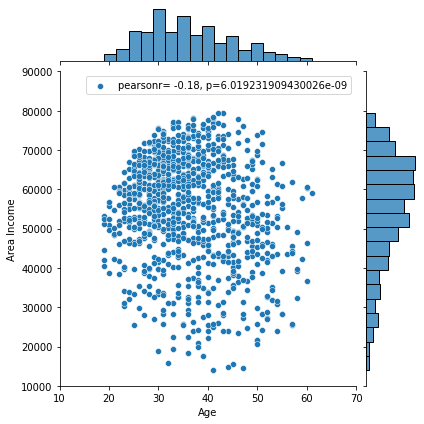

In [ ]:
plot1= sns.jointplot(x=df['Age'], y=df['Area Income'], xlim=(10,70), ylim=(10000,90000))
pearsonr, p= stats.pearsonr(df['Age'], df['Area Income'])
plot1.ax_joint.legend(['pearsonr= {:0.2f}, p={}'.format(pearsonr,p)])
#Pearsonr coefficient is used to get the info about how two datasets are linearly co-related to each other.
#pearsonr= +1 : Strong Positve linear relation
#pearsonr= 0 : No linear relation
#pearsonr= -1 : Strong Negative linear relation  

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


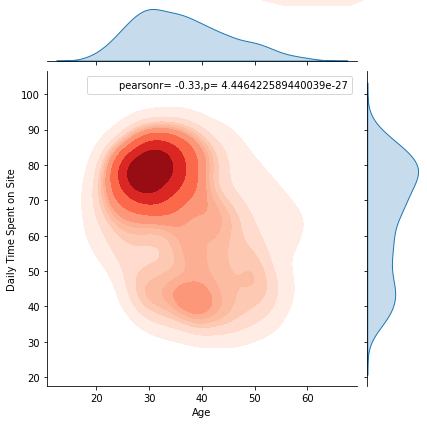

In [ ]:
plot2=sns.jointplot(df['Age'],df['Daily Time Spent on Site'],kind='kde',cmap='Reds',fill=True)
pearsonr,p = stats.pearsonr(df['Age'],df['Daily Time Spent on Site'])
plot2.ax_joint.legend(['pearsonr= {:0.2f},p= {}'.format(pearsonr,p)])

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


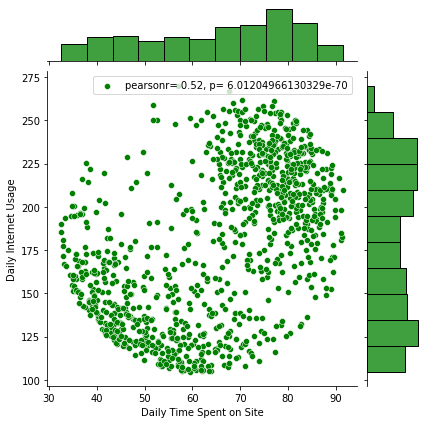

In [ ]:
plot3=sns.jointplot(df['Daily Time Spent on Site'],df['Daily Internet Usage'],color='green')
pearsonr,p= stats.pearsonr(df['Daily Time Spent on Site'],df['Daily Internet Usage'])
plot3.ax_joint.legend(['pearsonr= {:0.2f}, p= {}'.format(pearsonr,p)])

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

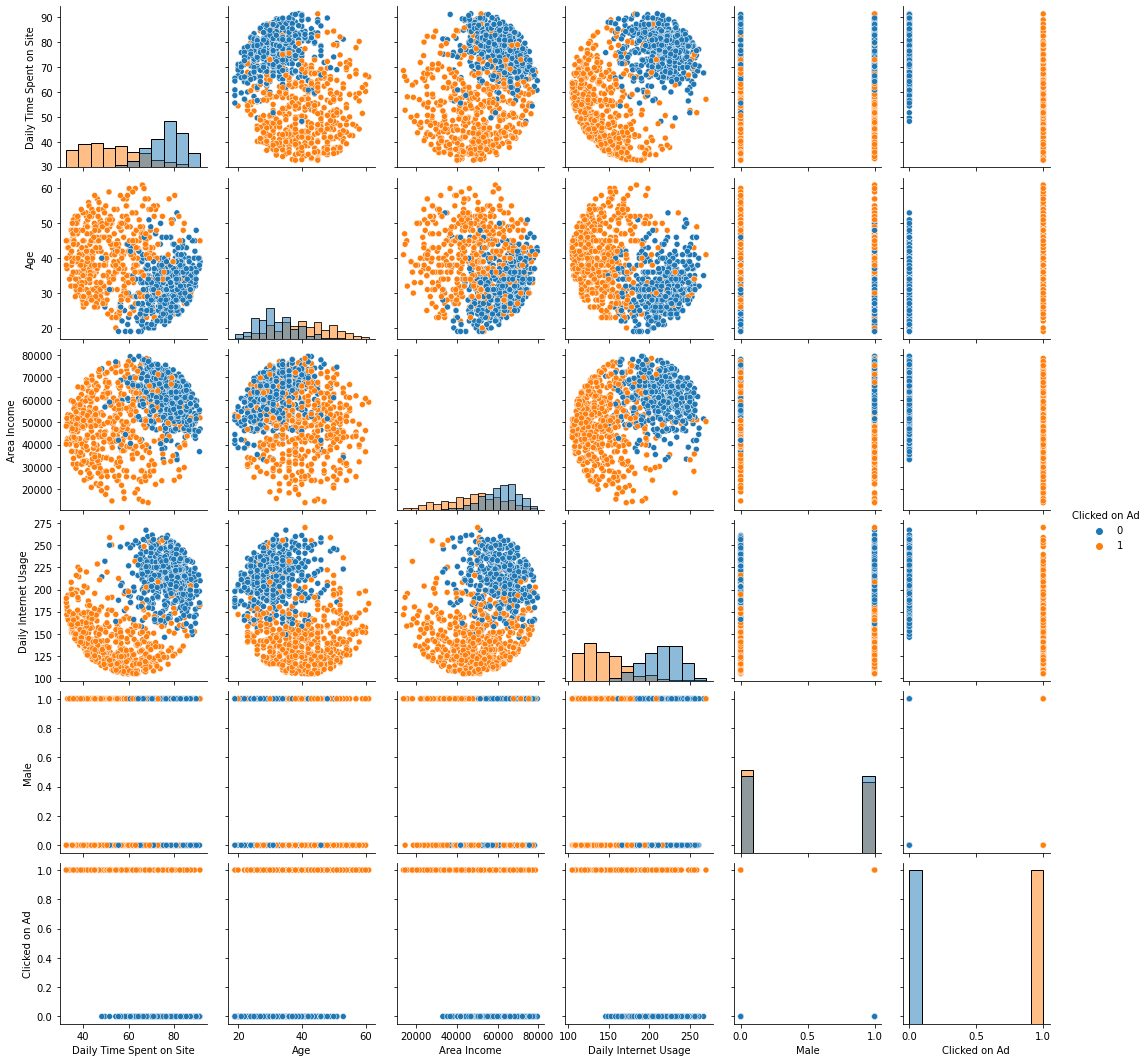

In [ ]:
sns.pairplot(data=df,vars=['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Clicked on Ad'],diag_kind='hist', hue='Clicked on Ad',hue_order=[0,1])

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split  

In [ ]:
X= df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [ ]:
y=df['Clicked on Ad']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

** Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Log= LogisticRegression(n_jobs=1,multi_class='ovr',solver='liblinear')

In [ ]:
Log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
predictions= Log.predict(X_test)

** Create a classification report for the model.**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.93      0.82      0.87       157

    accuracy                           0.87       300
   macro avg       0.88      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300

